 # Steps in Machine Learning and model building
    1- Data Preprocessing
    2- train test data
    3- Algorithm setup
    4- Model fitting
    5- Prediction
    6- Model Evaluate
    7- Model export

# Step-1 Data Processing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import matplotlib.ticker as ticker

from matplotlib.ticker import NullFormatter
from sklearn import preprocessing

%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [5]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

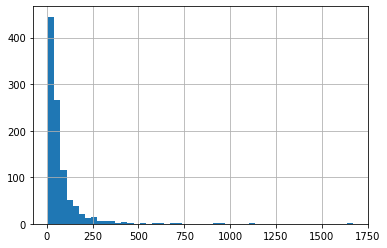

In [9]:
df['income'].hist(bins=50)

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [11]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values

In [12]:
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [13]:
y =df['custcat'].values

In [14]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [15]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [16]:
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Step-2 Train Test Data

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.2, random_state=4)

In [19]:
xtrain.shape

(800, 11)

In [20]:
ytrain.shape

(800,)

In [21]:
xtest.shape

(200, 11)

In [22]:
ytest.shape

(200,)

In [23]:
print('Train data', xtrain.shape, ytrain.shape)

Train data (800, 11) (800,)


In [24]:
print('Test data', xtest.shape, ytest.shape)

Test data (200, 11) (200,)


# Step-3 Algorithm Setup

<h3>K nearest neighbor (KNN)</h3>

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Step-4 Model Fitting

### Training

Lets start the algorithm with k=4 for now:

In [26]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

# Step-5 Prediction

In [27]:
yhat = neigh.predict(xtest)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# Step-6 Accuracy

### Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.

###  Recall: It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.

###  Log loss is generally called as loss function and it is the measure of error. We want our error to be as small as possible. Here instead of maximizing accuracy, we are minimizing error.

###  Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

In [41]:
from sklearn import metrics
print ('Train set accuracy ' , metrics.accuracy_score(ytrain,neigh.predict(xtrain)))
print ('Test set accuracy ' , metrics.accuracy_score(ytest,yhat))

Train set accuracy  0.5475
Test set accuracy  0.32
